In [13]:
# Imports
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Create SHAP Explainer for Random Forest
# Use TreeExplainer for Random Forest
rf_model = joblib.load("../models/rf_model.pkl")
X_test = np.load("../data/model_data/X_test.npy")
explainer = shap.TreeExplainer(rf_model)
print(X_test[:100].shape)
print(rf_model)
print(rf_model.n_features_in_)



(100, 8)
RandomForestClassifier(class_weight='balanced', random_state=42)
8


In [15]:
# shap_values = explainer.shap_values(X_test)
X_sample = X_test[:100]  # Or even :50 to start
shap_values = explainer.shap_values(X_sample)

In [18]:
print(type(shap_values))         # Is it a list?
print(len(shap_values))          # Number of classes
print(shap_values[0].shape)      # Shape of the SHAP values for class 0
print(X_sample.shape)            # Shape of the input data

<class 'numpy.ndarray'>
100
(8, 2)
(100, 8)


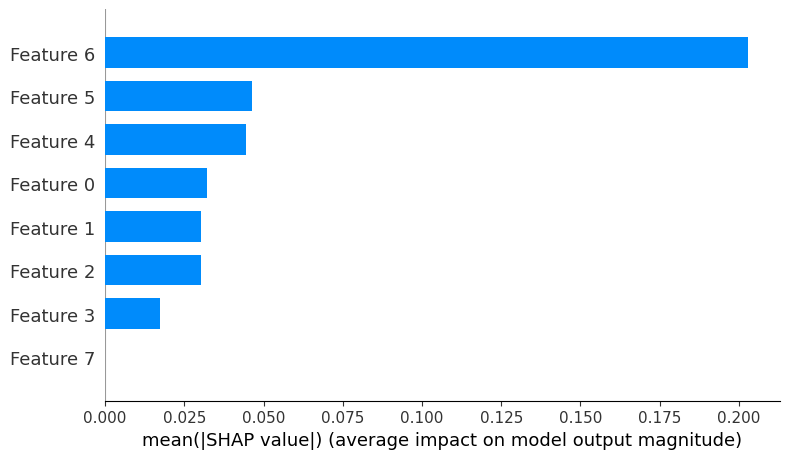

In [ ]:
# Summary Plot (Global Feature Importance)
# Plot global feature importance

shap.summary_plot(np.mean(np.abs(shap_values), axis=2), X_sample, plot_type="bar")



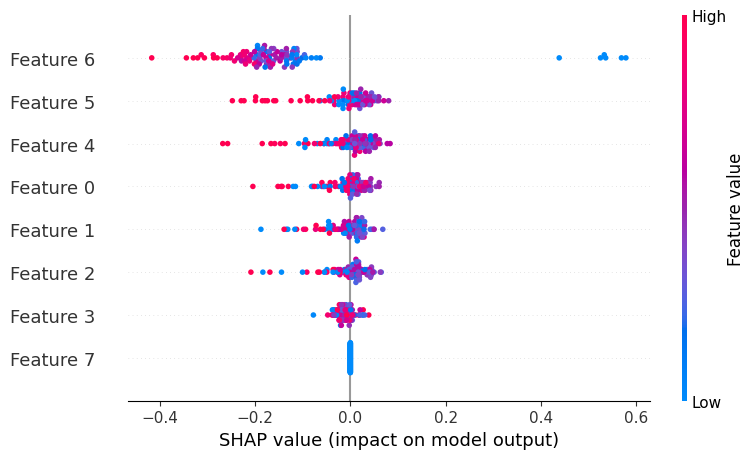

In [26]:
# SHAP Beeswarm Summary Plot
# SHAP summary plot (detailed distribution)
shap.summary_plot(shap_values[:,:, 1], X_sample)


In [ ]:
# SHAP Force Plot (Local Explainability)
# Visualize a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[:,:,1], shap_values[:, :, 1][0], X_sample.iloc[0])


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
num1 = input("Please enter a number 1: ")
num2 = input("Please enter a number 2: ")
sum_result = int(num1) + int(num2)